## 目標

ワインの成分データから、そのワインの品質を予測してください。データセットのqualityカラムが目的変数、それ以外が説明変数となります。  
qualityカラムは0.0-10.0の101段階評価になっていますが、これを回帰分析し、予測値は0.0-10.0の連続値としてください。

## データ

訓練データセットに含まれるカラムを以下に示します。(テストデータセットにはqualityカラムは含まれません。)

カラム名|説明
---|---
fixed acidity | 酒石酸濃度
volatile acidity | 酢酸濃度
citric acid | クエン酸濃度
residual sugar | 発酵後に残っている砂糖の量
chlorides | ワインに含まれる塩分量
free sulfur dioxide | 遊離二酸化硫黄の量
total sulfur dioxide | (すべての)二酸化硫黄の量
density | ワインの密度
pH | ワインのpH
sulphates | ワインに含まれる硫酸塩の量
alcohol | アルコールの度数
quality | ワインの評価

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [62]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/Users/kanekotakafumi/github/tokyou-u_chapters/GCI2020/competition2/input/"

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [6]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は1280、変数は12種類です。
テストデータのデータ数は319、変数は11種類です


In [7]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6
5,8.0,0.82,0.29,4.3,0.082,20.8,65.7,0.9934,3.15,0.53,9.4,5.3
6,7.8,0.88,0.26,3.8,0.106,31.1,66.4,1.0110,3.29,0.47,9.2,5.2
7,7.7,0.71,0.01,2.1,0.064,31.0,42.8,0.9831,3.40,0.57,11.9,5.8
8,7.5,0.44,0.31,2.1,0.069,12.9,72.5,0.9825,3.26,0.54,10.0,5.5
9,7.6,0.78,0.19,5.1,0.094,19.2,98.2,0.9985,3.18,0.52,9.6,6.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 12 columns):
fixed acidity           1280 non-null float64
volatile acidity        1280 non-null float64
citric acid             1280 non-null float64
residual sugar          1280 non-null float64
chlorides               1280 non-null float64
free sulfur dioxide     1280 non-null float64
total sulfur dioxide    1280 non-null float64
density                 1158 non-null float64
pH                      1143 non-null float64
sulphates               1280 non-null float64
alcohol                 1280 non-null float64
quality                 1280 non-null float64
dtypes: float64(12)
memory usage: 120.1 KB


In [61]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecule sulfur dioxide,fixed acidity percentage
count,1280.00000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1158.000000,1143.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.34125,0.527187,0.271383,2.549766,0.087614,15.599844,45.652812,0.997019,3.309405,0.658953,10.427813,5.614297,0.714844,8.612633
std,1.74115,0.181153,0.194353,1.452651,0.049233,10.482150,32.914044,0.010262,0.158249,0.175200,1.065322,0.987628,0.953541,1.876500
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.951600,2.720000,0.330000,8.400000,2.500000,0.000000,4.870000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,21.675000,0.990300,3.210000,0.550000,9.500000,4.900000,0.000000,7.267500
50%,8.00000,0.520000,0.260000,2.200000,0.079000,13.100000,36.800000,0.997350,3.310000,0.620000,10.200000,5.500000,0.000000,8.200000
75%,9.30000,0.640000,0.430000,2.600000,0.090250,20.925000,60.350000,1.003500,3.400000,0.730000,11.100000,6.300000,2.000000,9.640000
max,15.90000,1.610000,1.000000,15.500000,0.615000,71.800000,290.300000,1.029000,3.970000,2.050000,15.000000,9.700000,2.000000,16.550000


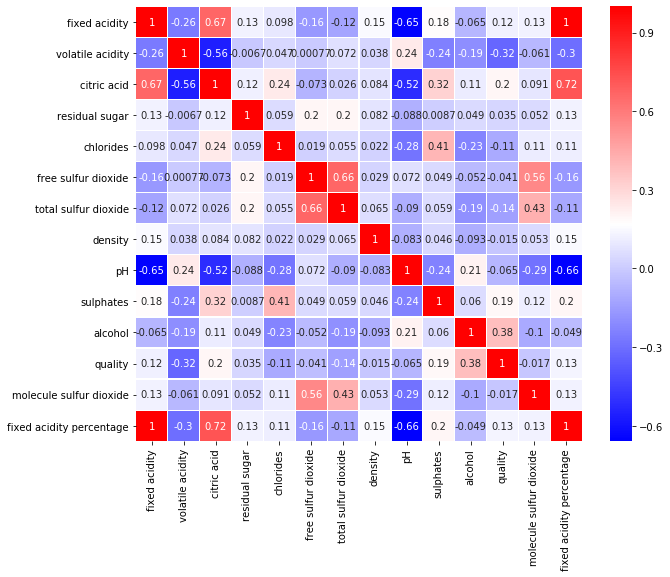

In [60]:
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

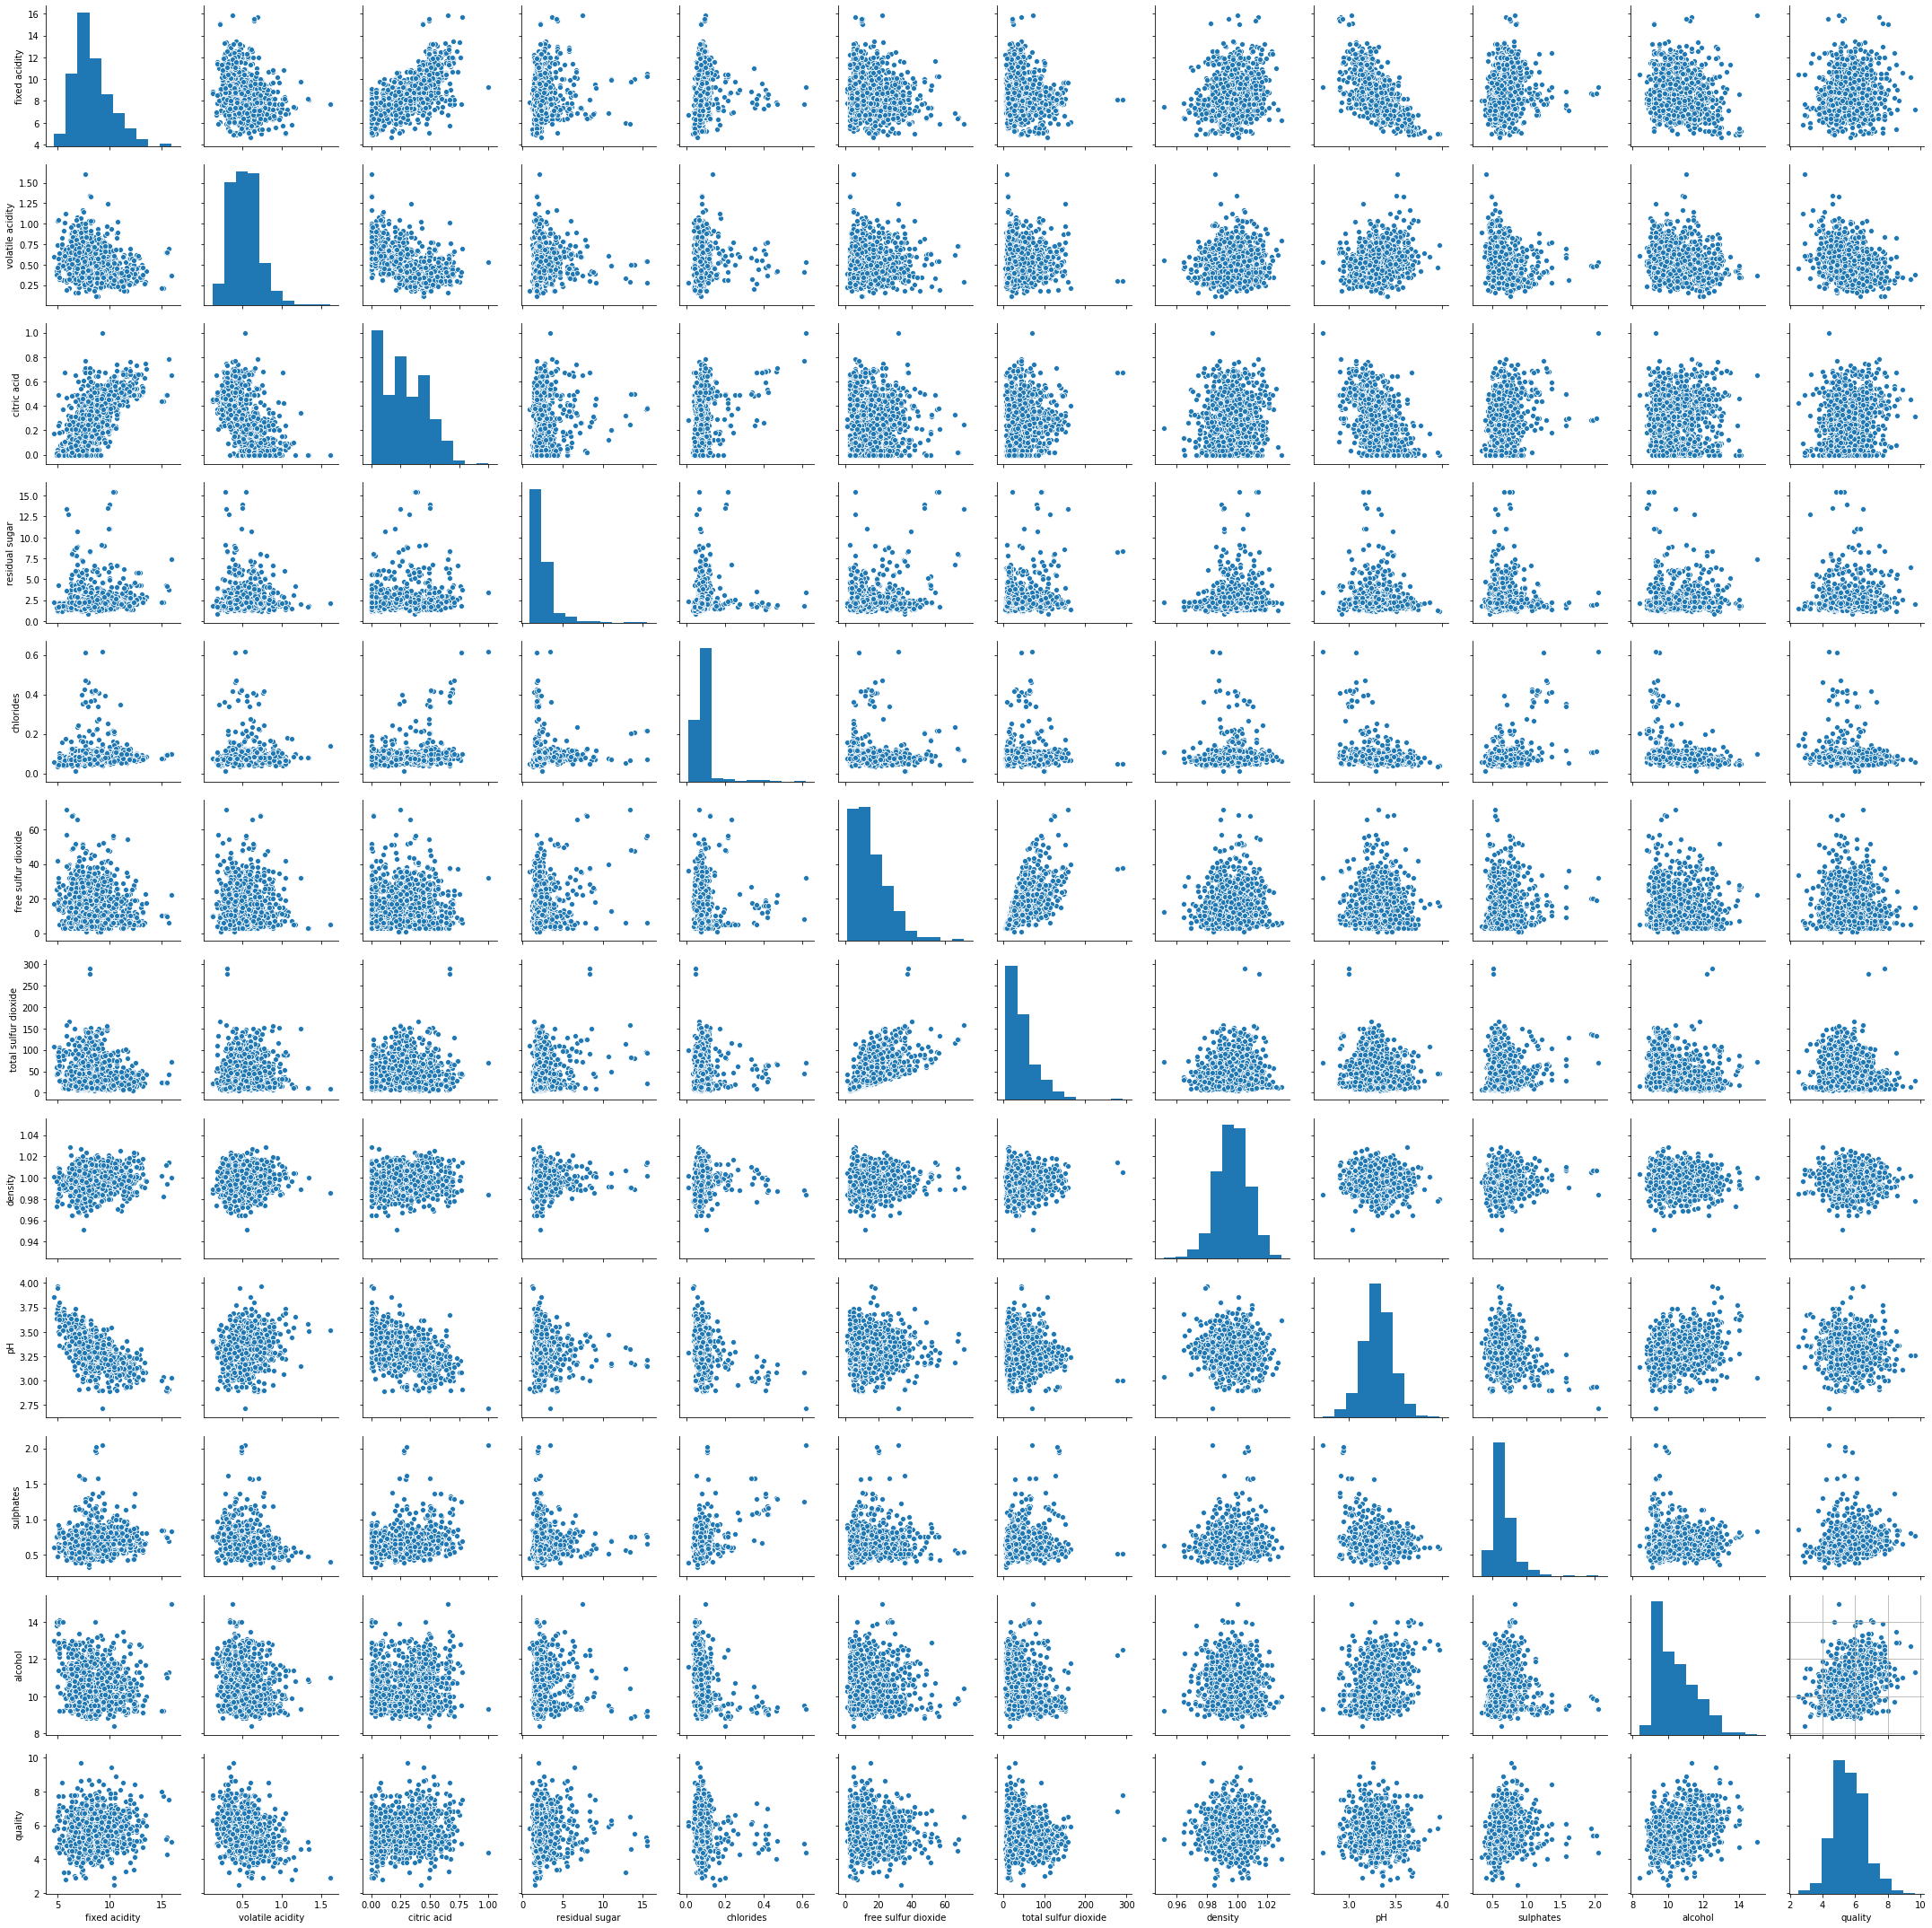

In [63]:
sns.pairplot(df)
plt.grid(True)

In [11]:
df['sulfur dioxide percentage'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [13]:
df['hydrogen ion concentration'] = 10 ** -df['pH']

In [50]:
df['molecule sulfur dioxide'] = df['free sulfur dioxide'] / (1 + 10 ** (df['pH'] - 1.81))

In [52]:
df['molecule sulfur dioxide'].describe()

count    1143.000000
mean        0.501679
std         0.399161
min         0.021897
25%         0.234804
50%         0.386884
75%         0.645977
max         3.505580
Name: molecule sulfur dioxide, dtype: float64

In [28]:
6.1 / (1 + 10 ** (3.08 - 1.81))

0.3108934300631992

In [26]:
10 ** (2.9 - 1.81)

12.30268770812381

In [59]:
df["fixed acidity percentage"] = df["fixed acidity"] + df["citric acid"]

In [53]:
label_encoding = lambda x: 0 if x < 0.6 else 1 if x > 2 else 2

In [54]:
df['molecule sulfur dioxide'] = df['molecule sulfur dioxide'].map(label_encoding)

In [55]:
df.groupby('molecule sulfur dioxide').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
molecule sulfur dioxide,,,,,,,,,,,,
0,816,816,816,816,816,816,816,735,816,816,816,816
1,13,13,13,13,13,13,13,13,13,13,13,13
2,451,451,451,451,451,451,451,410,314,451,451,451
